# question 1 Lab 6

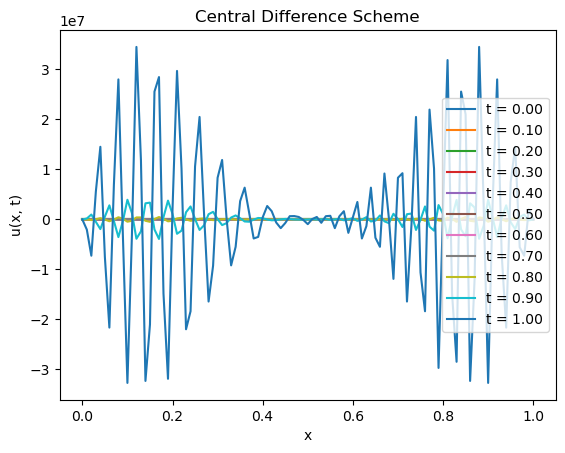

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
v = 1.0
L = 1.0  # Length of the spatial domain
T = 1.0  # Total simulation time
dx = 0.01  # Spatial step size
dt = dx / 2.0  # Temporal step size
Nx = int(L / dx) + 1  # Number of spatial grid points
Nt = int(T / dt) + 1  # Number of temporal grid points

# Initial condition
u0 = np.ones(Nx)

# Initialize solution arrays
u_central = np.zeros((Nt, Nx))
u_upwind = np.zeros((Nt, Nx))

# Set initial condition
u_central[0, :] = u0
u_upwind[0, :] = u0

# Central Difference Scheme
for n in range(0, Nt - 1):
    for i in range(1, Nx - 1):
        u_central[n + 1, i] = u_central[n, i] - v * dt / (2 * dx) * (u_central[n, i + 1] - u_central[n, i - 1])

# Upwind Scheme
for n in range(0, Nt - 1):
    for i in range(1, Nx):
        u_upwind[n + 1, i] = u_upwind[n, i] - v * dt / dx * (u_upwind[n, i] - u_upwind[n, i - 1])

# Plotting
x_values = np.linspace(0, L, Nx)

# Plot central difference scheme


plt.title('Central Difference Scheme')
plt.xlabel('x')
plt.ylabel('u(x, t)')
for n in range(0, Nt, int(Nt / 10)):
    plt.plot(x_values, u_central[n, :], label=f't = {n * dt:.2f}')
plt.legend()





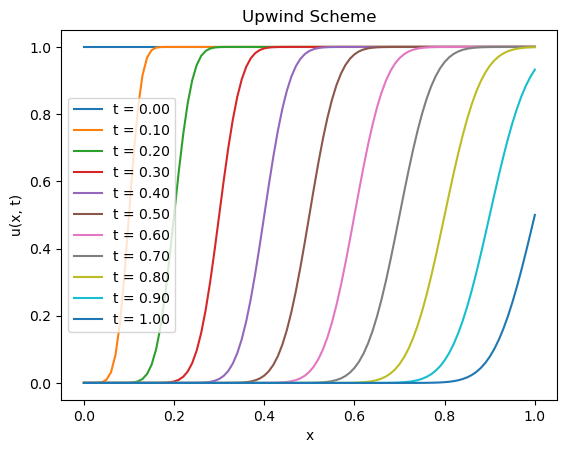

In [2]:
# Plot upwind scheme
plt.title('Upwind Scheme')
plt.xlabel('x')
plt.ylabel('u(x, t)')
for n in range(0, Nt, int(Nt / 10)):
    plt.plot(x_values, u_upwind[n, :], label=f't = {n * dt:.2f}')
plt.legend()


plt.show()

# Question 2

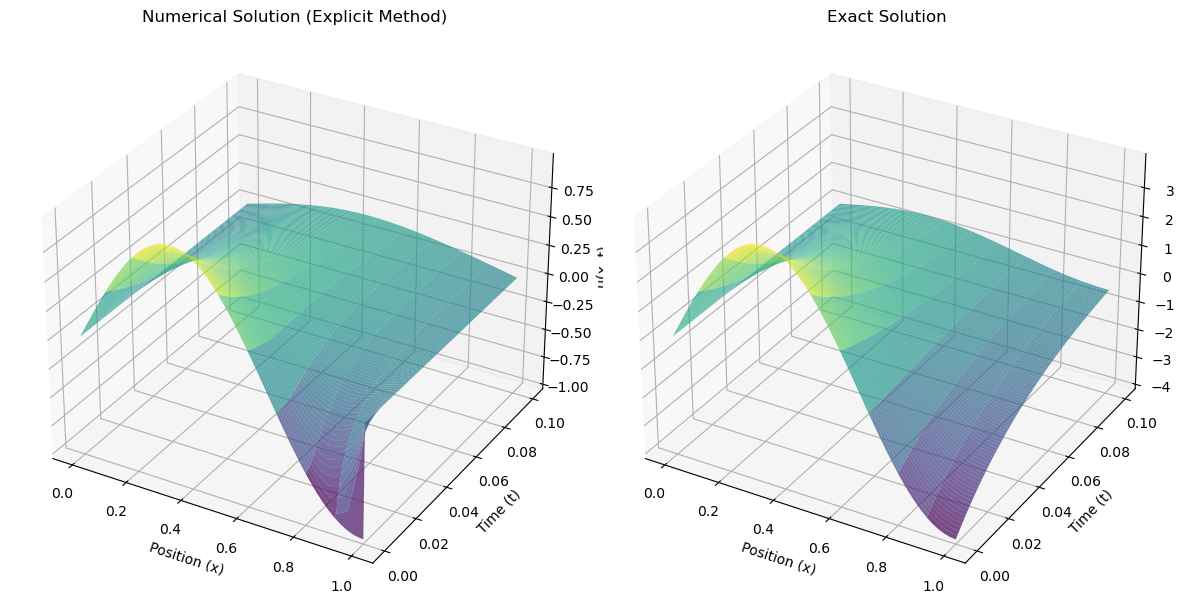

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def heat_conduction_solver(L, T, Nx, Nt, alpha):
    dx = L / Nx
    dt = T / Nt
    r = alpha * dt / dx**2

    # Initialize grid
    x = np.linspace(0, L, Nx + 1)
    t = np.linspace(0, T, Nt + 1)
    u = np.zeros((Nt + 1, Nx + 1))

    u[0, :] = np.sin(np.pi * x * 3 / 2)
    u[:, 0] = 0
    
    for n in range(0, Nt):
        for i in range(1, Nx):
            u[n + 1, i] = u[n, i] + r * (u[n, i + 1] - 2 * u[n, i] + u[n, i - 1])

    return x, t, u

def exact_solution(x, t):
    return np.exp(-9 * np.pi**2 * t / 4) * 4 * np.sin(3 * np.pi * x / 2)

# Parameters
L = 1.0
T = 0.1
Nx = 50
Nt = 500
alpha = 1

x, t, u_explicit = heat_conduction_solver(L, T, Nx, Nt, alpha)
X, T = np.meshgrid(x, t)

exact_solution_values = exact_solution(X, T)

# Plot results
fig = plt.figure(figsize=(12, 6))

# Plot numerical solution
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, T, u_explicit, cmap='viridis', rstride=5, cstride=5, alpha=0.7)
ax1.set_title('Numerical Solution (Explicit Method)')
ax1.set_xlabel('Position (x)')
ax1.set_ylabel('Time (t)')
ax1.set_zlabel('u(x, t)')

# Plot exact solution
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, T, exact_solution_values, cmap='viridis', rstride=5, cstride=5, alpha=0.7)
ax2.set_title('Exact Solution')
ax2.set_xlabel('Position (x)')
ax2.set_ylabel('Time (t)')
ax2.set_zlabel('u(x, t)')

plt.tight_layout()
plt.show()


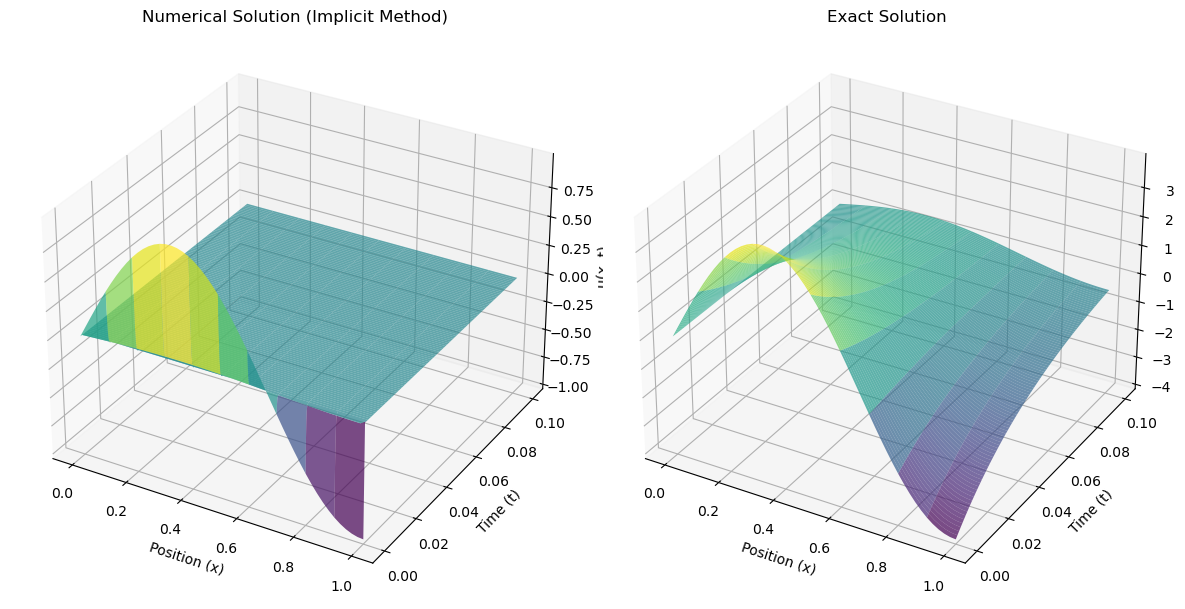

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def thomas_algorithm(A, b):
    """
    Thomas algorithm for solving a tridiagonal system of equations.
    """
    N = len(b)
    c_prime = np.zeros(N - 1)
    d_prime = np.zeros(N)

    c_prime[0] = A[0, 1] / A[0, 0]
    d_prime[0] = b[0] / A[0, 0]

    for i in range(1, N - 1):
        c_prime[i] = A[i, i + 1] / (A[i, i] - A[i, i - 1] * c_prime[i - 1])
        d_prime[i] = (b[i] - A[i, i - 1] * d_prime[i - 1]) / (A[i, i] - A[i, i - 1] * c_prime[i - 1])

    d_prime[-1] = (b[-1] - A[-1, -2] * d_prime[-2]) / (A[-1, -1] - A[-1, -2] * c_prime[-2])

    x = np.zeros(N)
    x[-1] = d_prime[-1]

    for i in range(N - 2, -1, -1):
        x[i] = d_prime[i] - c_prime[i] * x[i + 1]

    return x

def heat_conduction_solver_implicit(L, T, Nx, Nt, alpha):
    dx = L / Nx
    dt = T / Nt
    r = alpha * dt / dx**2

    # Initialize grid
    x = np.linspace(0, L, Nx + 1)
    t = np.linspace(0, T, Nt + 1)
    u = np.zeros((Nt + 1, Nx + 1))

    u[0, :] = np.sin(np.pi * x * 3 / 2)
    u[:, 0] = 0
    
    # Time-stepping loop
    for n in range(0, Nt):
        A = np.zeros((Nx - 1, Nx - 1))
        b = np.zeros(Nx - 1)

        # Construct the tridiagonal matrix A and the right-hand side vector b
        for i in range(1, Nx):
            A[i - 1, i - 1] = 1 + 2 * r
            b[i - 1] = u[n, i] + r * (u[n + 1, i - 1] - 2 * u[n + 1, i] + u[n + 1, i + 1])

        # Solve the tridiagonal system using the Thomas algorithm
        u[n + 1, 1:Nx] = thomas_algorithm(A, b)

    return x, t, u

# Parameters
L = 1.0
T = 0.1
Nx = 50
Nt = 500
alpha = 1

x, t, u_implicit = heat_conduction_solver_implicit(L, T, Nx, Nt, alpha)
X, T = np.meshgrid(x, t)

exact_solution_values = exact_solution(X, T)

# Plot results
fig = plt.figure(figsize=(12, 6))

# Plot numerical solution
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, T, u_implicit, cmap='viridis', rstride=5, cstride=5, alpha=0.7)
ax1.set_title('Numerical Solution (Implicit Method)')
ax1.set_xlabel('Position (x)')
ax1.set_ylabel('Time (t)')
ax1.set_zlabel('u(x, t)')

# Plot exact solution
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, T, exact_solution_values, cmap='viridis', rstride=5, cstride=5, alpha=0.7)
ax2.set_title('Exact Solution')
ax2.set_xlabel('Position (x)')
ax2.set_ylabel('Time (t)')
ax2.set_zlabel('u(x, t)')

plt.tight_layout()
plt.show()


# Lab sheet 7 Question 1


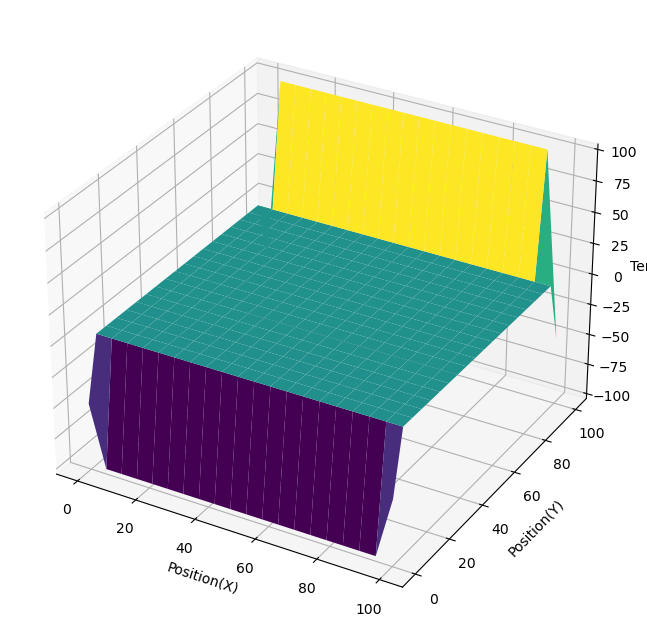

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
L = 100  # Plate side length
segments = 20  # Number of segments
dx = dy = L / (segments - 1)  # Grid increment
dt = 0.01  # Time step (adjust as needed)

# Create grid
x = np.linspace(0, L, segments)
y = np.linspace(0, L, segments)
X, Y = np.meshgrid(x, y)

# Initial conditions
T = np.zeros_like(X)
T[:, 0] = 0  # T(x=0) = 0
T[:, -1] = 0  # T(x=L) = 0
T[0, :] = -100  # T(y=0) = -100
T[-1, :] = 100  # T(y=L) = 100
T[0, 0] = T[0, -1] = T[-1, 0] = T[-1, -1] = (T[0, 1] + T[1, 0]) / 2  # Corner points

# Crank-Nicolson method
alpha = 0.5 * dt / dx**2
beta = 0.5 * dt / dy**2

for _ in range(1000):
    Tn = T.copy()
    for i in range(1, segments - 1):
        for j in range(1, segments - 1):
            T[i, j] = alpha * (Tn[i + 1, j] - 2 * Tn[i, j] + Tn[i - 1, j]) + beta * (
                    Tn[i, j + 1] - 2 * Tn[i, j] + Tn[i, j - 1])
            T[i, j] /= 1 + 2 * (alpha + beta)

# Surface plot
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(10, 8))
ax.plot_surface(X, Y, T, cmap='viridis')

ax.set_xlabel('Position(X)')
ax.set_ylabel('Position(Y)')
ax.set_zlabel('Temp')

# Show plot
plt.show()


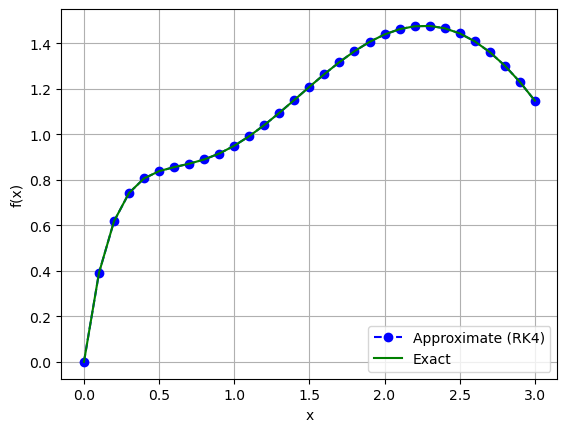

x = 0.0  y = 0
x = 0.1  y = 0.3909368924370615
x = 0.2  y = 0.6178308309844314
x = 0.30000000000000004  y = 0.742293078297358
x = 0.4  y = 0.8063473210409928
x = 0.5  y = 0.8380866412609683
x = 0.6000000000000001  y = 0.8557615077527113
x = 0.7000000000000001  y = 0.8707247937189059
x = 0.8  y = 0.8895458775120972
x = 0.9  y = 0.9155221007173486
x = 1.0  y = 0.9497543092748661
x = 1.1  y = 0.9919080326174029
x = 1.2000000000000002  y = 1.0407487415315135
x = 1.3  y = 1.0945153801993677
x = 1.4000000000000001  y = 1.1511786417056524
x = 1.5  y = 1.2086175176488048
x = 1.6  y = 1.2647382262389668
x = 1.7000000000000002  y = 1.3175527709917456
x = 1.8  y = 1.3652294137540277
x = 1.9000000000000001  y = 1.4061237542727876
x = 2.0  y = 1.4387965216160552
x = 2.1  y = 1.4620223275117332
x = 2.2  y = 1.4747923081401348
x = 2.3000000000000003  y = 1.4763126428310804
x = 2.4000000000000004  y = 1.4660002786279507
x = 2.5  y = 1.4434767308637237
x = 2.6  y = 1.4085605150188685
x = 2.7  y = 1.361

In [6]:


def F(y, u, x):
    return (10*np.sin(x))-(5*u)-(6*y)

def exact(x):
    return -6*np.exp(-3*x)+7*np.exp(-2*x)+np.sin(x)-np.cos(x)



h=0.1
xpoints = np.arange(0, 3+h, h)
ypoints = []
upoints = []
exactpoints=[]

y = 0
u = 5
s=0;
for x in xpoints:
    ypoints.append(y)
    upoints.append(u)
    exactpoints.append(exact(x))

    m1 = h*u
    k1 = h*F(y, u, x) 
    

    m2 = h*(u + 0.5*k1)
    k2 = h*F(y+0.5*m1, u+0.5*k1, x+0.5*h)

    m3 = h*(u + 0.5*k2)
    k3 = h*F(y+0.5*m2, u+0.5*k2, x+0.5*h)

    m4 = h*(u + k3)
    k4 = h*F(y+m3, u+k3, x+h)

    y += (m1 + 2*m2 + 2*m3 + m4)/6
    u += (k1 + 2*k2 + 2*k3 + k4)/6




plt.plot(xpoints, ypoints, 'bo--',label='Approximate (RK4)')
plt.plot(xpoints, exactpoints, 'g', label='Exact')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

for xx, yy in zip(xpoints, ypoints):
    print("x =", xx, " y =", yy)


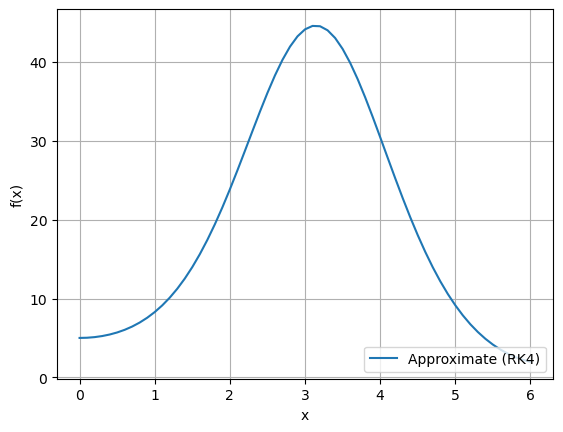

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return (x + y) * np.sin(x)

def runge_kutta_4th_order(h, initial_value, end_point):
    x = np.arange(0, end_point + h, h)
    y = np.zeros(len(x))
    y[0] = initial_value

    for i in range(1, len(x)):
        k1 = h * f(x[i - 1], y[i - 1])
        k2 = h * f(x[i - 1] + h / 2, y[i - 1] + k1 / 2)
        k3 = h * f(x[i - 1] + h / 2, y[i - 1] + k2 / 2)
        k4 = h * f(x[i - 1] + h, y[i - 1] + k3)

        y[i] = y[i - 1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return x, y

# Example usage:
h_value = 0.1
initial_value = 5
end_point_value = 6

x_result, y_result = runge_kutta_4th_order(h_value, initial_value, end_point_value)

plt.plot(x_result, y_result, label='Approximate (RK4)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend(loc='lower right')
plt.show()


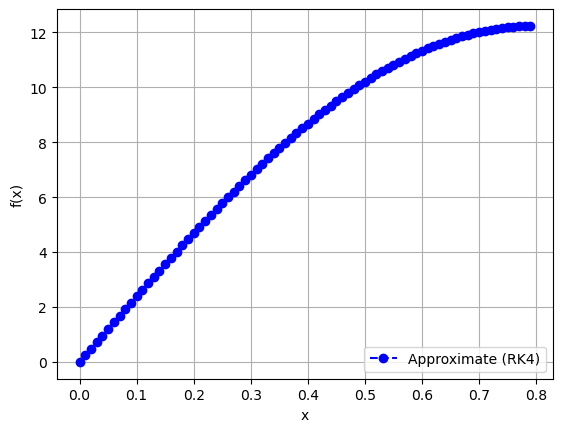

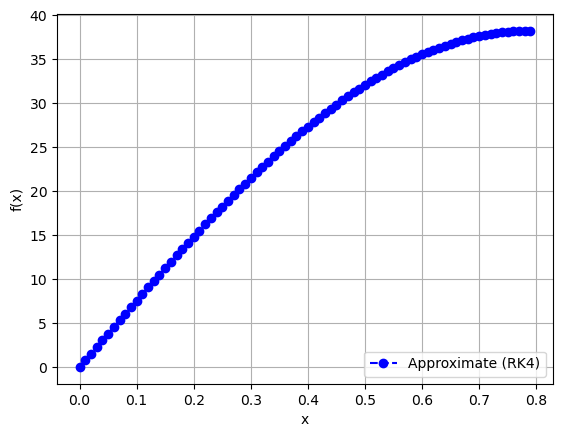

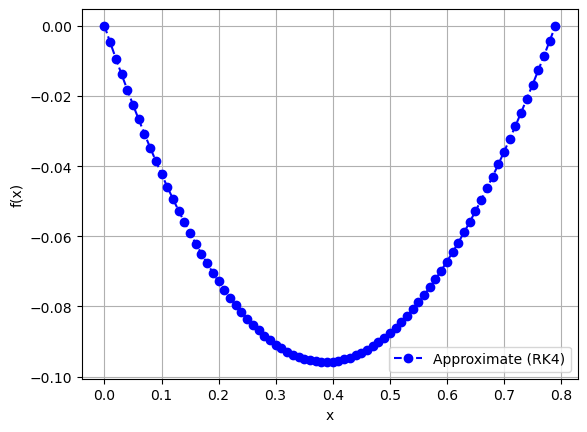

x = 0.0  y = 0
x = 0.01  y = -0.004703545550409616
x = 0.02  y = -0.009305218911964041
x = 0.03  y = -0.0138031944754285
x = 0.04  y = -0.018195698106804877
x = 0.05  y = -0.022481007854462047
x = 0.06  y = -0.02665745463439447
x = 0.07  y = -0.030723422893335312
x = 0.08  y = -0.03467735124945927
x = 0.09  y = -0.038517733110419394
x = 0.1  y = -0.042243117268471415
x = 0.11  y = -0.045852108472448146
x = 0.12  y = -0.04934336797635615
x = 0.13  y = -0.052715614064376144
x = 0.14  y = -0.055967622552058185
x = 0.15  y = -0.059098227263512326
x = 0.16  y = -0.06210632048440512
x = 0.17  y = -0.06499085339058214
x = 0.18  y = -0.06775083645214643
x = 0.19  y = -0.070385339812833
x = 0.2  y = -0.07289349364452902
x = 0.21  y = -0.07527448847679978
x = 0.22  y = -0.07752757550129054
x = 0.23  y = -0.07965206685088422
x = 0.24  y = -0.08164733585350549
x = 0.25  y = -0.08351281726047184
x = 0.26  y = -0.08524800744930246
x = 0.27  y = -0.0868524646009062
x = 0.28  y = -0.08832580885108018


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def F(y, u, x):
    return np.cos(x)-4*y

def runge_kutta_4th_order(h, x_range, initial_y, initial_u):
    xpoints = np.arange(x_range[0], x_range[1] + h, h)
    ypoints = []
    upoints = []

    y = initial_y
    u = initial_u

    for x in xpoints:
        ypoints.append(y)
        upoints.append(u)

        m1 = h * u
        k1 = h * F(y, u, x)

        m2 = h * (u + 0.5 * k1)
        k2 = h * F(y + 0.5 * m1, u + 0.5 * k1, x + 0.5 * h)

        m3 = h * (u + 0.5 * k2)
        k3 = h * F(y + 0.5 * m2, u + 0.5 * k2, x + 0.5 * h)

        m4 = h * (u + k3)
        k4 = h * F(y + m3, u + k3, x + h)

        y += (m1 + 2 * m2 + 2 * m3 + m4) / 6
        u += (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return xpoints, ypoints

def plot_runge_kutta(xpoints, ypoints):
    plt.plot(xpoints, ypoints, 'bo--', label='Approximate (RK4)')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

def print_results(xpoints, ypoints):
    for xx, yy in zip(xpoints, ypoints):
        print("x =", xx, " y =", yy)

# Example usage:
h_value = 0.01
x_range_values = (0, np.pi/4)
# initial_y_value = 1
# initial_u_value = 0

# xpoints, ypoints = runge_kutta_4th_order(h_value, x_range_values, initial_y_value, initial_u_value)
# plot_runge_kutta(xpoints, ypoints)
# print_results(xpoints, ypoints)


initial_value1=0;
initial_guess1=24;
initial_value2=0;
initial_guess2=76;
xpoints1, ypoints1 = runge_kutta_4th_order(h_value, x_range_values, initial_value1, initial_guess1)
plot_runge_kutta(xpoints1, ypoints1)
xpoints2, ypoints2= runge_kutta_4th_order(h_value, x_range_values, initial_value2, initial_guess2)
plot_runge_kutta(xpoints2, ypoints2)
dydx=(initial_guess2-initial_guess1)*(0-ypoints1[-1])/(ypoints2[-1]-ypoints1[-1])+initial_guess1
xpoints, ypoints = runge_kutta_4th_order(h_value, x_range_values, 0, dydx)
plot_runge_kutta(xpoints, ypoints)
print_results(xpoints, ypoints)


In [9]:
print(xpoints1[-1],ypoints1[-1])



0.79 12.237174710216035


In [10]:
print(xpoints2[-1],ypoints2[-1])

0.79 38.2360735187745


In [11]:
dydx=(initial_guess2-initial_guess1)*(0-ypoints1[-1])/(ypoints2[-1]-ypoints1[-1])+initial_guess1
dydx

-0.4753860391103224

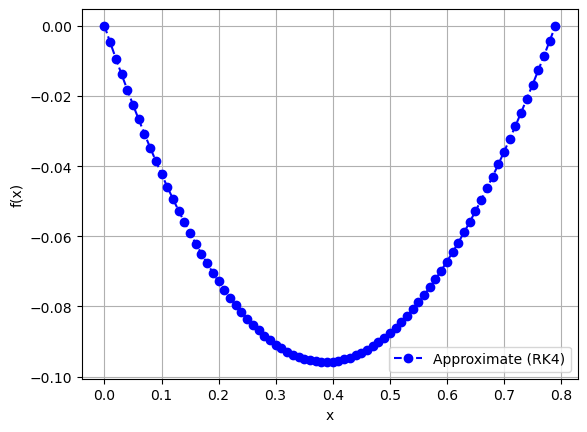

x = 0.0  y = 0
x = 0.01  y = -0.004703545550409616
x = 0.02  y = -0.009305218911964041
x = 0.03  y = -0.0138031944754285
x = 0.04  y = -0.018195698106804877
x = 0.05  y = -0.022481007854462047
x = 0.06  y = -0.02665745463439447
x = 0.07  y = -0.030723422893335312
x = 0.08  y = -0.03467735124945927
x = 0.09  y = -0.038517733110419394
x = 0.1  y = -0.042243117268471415
x = 0.11  y = -0.045852108472448146
x = 0.12  y = -0.04934336797635615
x = 0.13  y = -0.052715614064376144
x = 0.14  y = -0.055967622552058185
x = 0.15  y = -0.059098227263512326
x = 0.16  y = -0.06210632048440512
x = 0.17  y = -0.06499085339058214
x = 0.18  y = -0.06775083645214643
x = 0.19  y = -0.070385339812833
x = 0.2  y = -0.07289349364452902
x = 0.21  y = -0.07527448847679978
x = 0.22  y = -0.07752757550129054
x = 0.23  y = -0.07965206685088422
x = 0.24  y = -0.08164733585350549
x = 0.25  y = -0.08351281726047184
x = 0.26  y = -0.08524800744930246
x = 0.27  y = -0.0868524646009062
x = 0.28  y = -0.08832580885108018


In [12]:
xpoints, ypoints = runge_kutta_4th_order(h_value, x_range_values, 0, dydx)
plot_runge_kutta(xpoints, ypoints)
print_results(xpoints, ypoints)


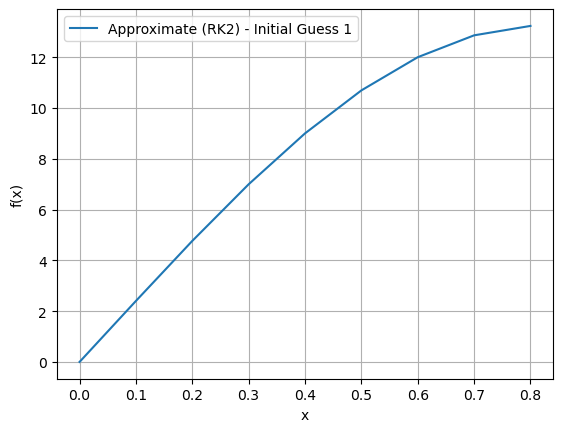

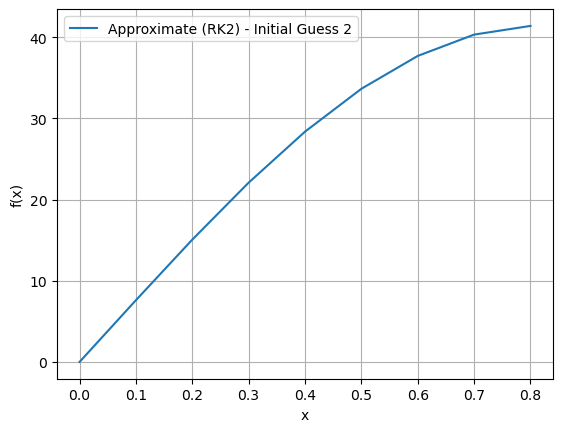

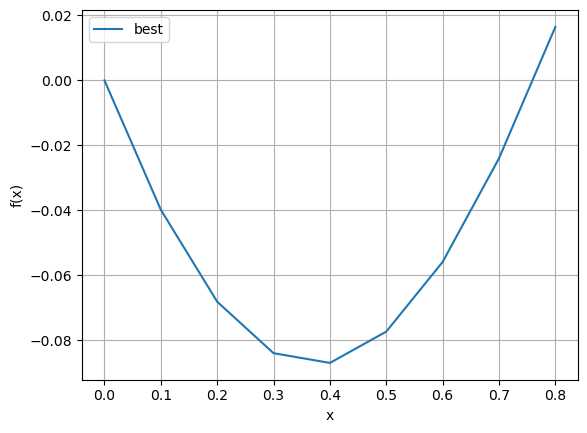

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def F(y, u, x):
    return np.cos(x) - 4 * y

import numpy as np

def runge_kutta_2nd_order(h, x_range, initial_y, initial_u):
    xpoints = np.arange(x_range[0], x_range[1] + h, h)
    ypoints = []
    upoints = []

    y = initial_y
    u = initial_u

    for x in xpoints:
        ypoints.append(y)
        upoints.append(u)

        m1 = h * u
        k1 = h * F(y, u, x)

        m2 = h * (u + 0.5 * k1)
        k2 = h * F(y + 0.5 * m1, u + 0.5 * k1, x + 0.5 * h)

        y += 0.5 * (m1 + m2)
        u += 0.5 * (k1 + k2)

    return xpoints, ypoints


def plot_runge_kutta(xpoints, ypoints, label):
    plt.plot(xpoints, ypoints, label=label)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid()
    plt.legend()
    plt.show()

def print_results(xpoints, ypoints):
    for xx, yy in zip(xpoints, ypoints):
        print("x =", xx, " y =", yy)

# Example usage:
h_value = 0.1
x_range_values = (0, np.pi / 4)

initial_value1 = 0
initial_guess1 = 24
initial_value2 = 0
initial_guess2 = 76

xpoints1, ypoints1 = runge_kutta_2nd_order(h_value, x_range_values, initial_value1, initial_guess1)
plot_runge_kutta(xpoints1, ypoints1, label='Approximate (RK2) - Initial Guess 1')

xpoints2, ypoints2 = runge_kutta_2nd_order(h_value, x_range_values, initial_value2, initial_guess2)
plot_runge_kutta(xpoints2, ypoints2, label='Approximate (RK2) - Initial Guess 2')

dydx=(initial_guess2-initial_guess1)*(0-ypoints1[-1])/(ypoints2[-1]-ypoints1[-1])+initial_guess1
xpoints, ypoints = runge_kutta_4th_order(h_value, x_range_values, 0, dydx)
plot_runge_kutta(xpoints, ypoints,'best')


Approximated root using Newton-Raphson: 0.6190612833553127
Exact square root of 2: 1.4142135623730951


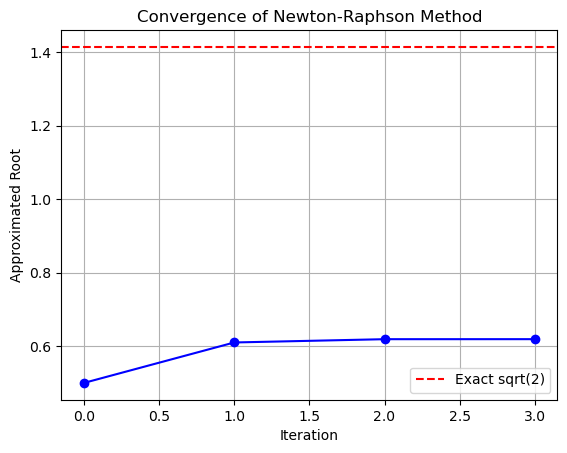

[0.5, 0.6100596549589618, 0.6189967797415397, 0.6190612833553127]


In [14]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.exp(x)-3*x
f_prime = lambda x: np.exp(x)-3

x0 = 0.5
tol = 1e-6

x_values = [x0]
while abs(f(x0)) >= tol:
    x0 = x0 - f(x0) / f_prime(x0)
    x_values.append(x0)

root_approximation = x_values[-1]

print("Approximated root using Newton-Raphson:", root_approximation)
print("Exact square root of 2:", np.sqrt(2))

# Plotting the convergence graph
plt.plot(x_values, 'bo-')
plt.axhline(y=np.sqrt(2), color='r', linestyle='--', label='Exact sqrt(2)')
plt.xlabel('Iteration')
plt.ylabel('Approximated Root')
plt.title('Convergence of Newton-Raphson Method')
plt.legend()
plt.grid()
plt.show()


print(x_values)
